# MAPPO Evaluation & Rendering

This runs the trained MAPPO policy with the patrolling zoo.

In [11]:
%reload_ext autoreload
%autoreload 2
from onpolicy.scripts.render.render_patrolling import get_config, parse_args, main

import os
import yaml
os.environ["WANDB__SERVICE_WAIT"] = "300"

## Configuration

In [12]:
# Set the run directory.
model_dir = "/home/anthony/dev/patrolling_zoo4/onpolicy/scripts/results/Patrolling/9nodes/rmappo/shareBuffSyncSkip/wandb/run-20230905_105346-l0i0dddv/files"

In [13]:
# Load the default arguments.
parser = get_config()
all_args = parse_args([], parser)

# Load new arguments from the config file.
config_file = os.path.join(model_dir, "config.yaml")
args = yaml.load(open(config_file), Loader=yaml.FullLoader)

# Convert the arguments to a Namespace object.
for a in args:
    if type(args[a]) == dict and "value" in args[a]:
        args[a] = args[a]["value"]
for a in args:
    setattr(all_args, a, args[a])

# Set required render-specific arguments. Do not change these!
all_args.use_wandb = False
all_args.use_render = True
all_args.model_dir = model_dir

In [14]:
# Feel free to change these arguments.
all_args.render_episodes = 1
all_args.episode_length = 100
all_args.max_cycles = all_args.episode_length

## Perform Rendering

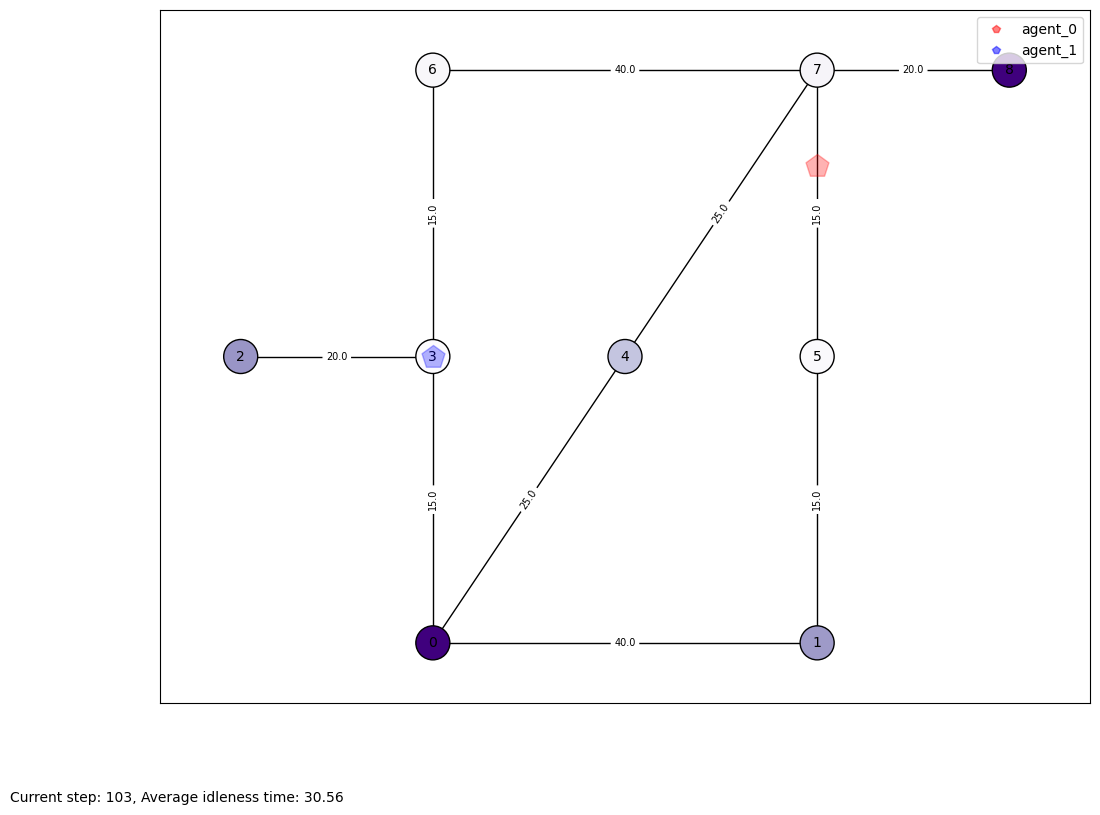

In [15]:
main([], parsed_args = all_args)